# Taxonomic resolution by rRNA gene(s)

Dependencies

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2_contingency, fisher_exact

Graphics

In [4]:
%matplotlib inline

In [5]:
mpl.rc('font', family='Arial', size=12)

Total number of sequences identified by RNAmmer

In [6]:
totals = {'Operon' : 253089,
          '16S-23S': 253088,
          '16S'    : 253089,
          '23S'    : 253088,
          '5S'     : 50709}

Per-sample per-rank assignment counts

In [7]:
data_dir = 'data'

Read input data

In [8]:
data = {}
for key in totals.keys():
    data[key] = pd.read_csv(f'{data_dir}/{key}.tsv', sep='\t', dtype={'#SampleID': str}).set_index('#SampleID')

In [9]:
data['16S'].head()

,kingdom,phylum,class,order,family,genus,species,strain
#SampleID,,,,,,,,
10317.000101098,135,10,14,27,10,26,3330,55
10317.000101104,48,0,0,1,0,34,1363,28
10317.000101105,56,222,59,202,35,36,1968,465
10317.000101109,208,44,5,69,9,100,2573,54
10317.000101112,2,1,0,11,8,1757,451,44


Calculate total assignment counts

In [10]:
counts = {x: data[x].sum() for x in totals.keys()}
dfc = pd.DataFrame(counts)
dfc.to_csv('counts.tsv', sep='\t')
dfc

,Operon,16S-23S,16S,23S,5S
kingdom,4486,157,17023,16295,995
phylum,3296,79,4738,8630,20407
class,596,199,2331,6123,97
order,2584,3397,33358,26072,7299
family,738,1543,7694,8892,2132
genus,26044,9335,62165,80323,1101
species,162775,182633,97100,99771,16560
strain,52570,55744,28679,6981,1969


Calculate total assignment rates (%)

In [11]:
rates = {x: counts[x] / totals[x] * 100 for x in totals.keys()}
dfr = pd.DataFrame(rates)
dfr.to_csv('rates.tsv', sep='\t')
dfr

,Operon,16S-23S,16S,23S,5S
kingdom,1.772499,0.062034,6.726092,6.438472,1.962176
phylum,1.302309,0.031214,1.872069,3.409881,40.243349
class,0.235490,0.078629,0.921020,2.419317,0.191288
order,1.020985,1.342221,13.180344,10.301555,14.393895
family,0.291597,0.609669,3.040037,3.513402,4.204382
genus,10.290451,3.688440,24.562506,31.737182,2.171212
species,64.315320,72.161857,38.365950,39.421466,32.656925
strain,20.771349,22.025541,11.331587,2.758329,3.882940


Plot assignment ratios

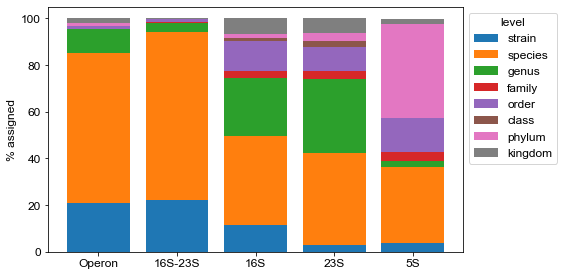

In [12]:
fig = plt.figure(figsize=(8, 4))
n = dfr.shape[1]
bottom = [0.0] * n
for level in dfr.index[::-1]:
    heights = dfr.loc[level]
    plt.bar(range(n), heights, bottom=bottom, label=level)
    bottom = np.add(bottom, heights)
plt.ylabel('% assigned')
plt.xticks(range(n), dfr.columns)
plt.legend(title='level', bbox_to_anchor=(1, 1))
fig.tight_layout()
fig.savefig('plot.pdf', bbox_inches='tight')

Statistical test

In [13]:
grps = ('Operon', '16S')

Rates at species or below

In [14]:
for grp in grps:
    rate = dfr[grp]['species'] + dfr[grp]['strain']
    print(f'{grp}: {rate:.2f}%')

Operon: 85.09%
16S: 49.70%


Contigency table

In [15]:
ctab = []
for grp in grps:
    ctab.append([])
    ctab[-1].append(dfc[grp]['species'] + dfc[grp]['strain'])
    ctab[-1].append(totals[grp] - ctab[-1][0])
ctab

[[215345, 37744], [125779, 127310]]

Chi-square test (Pearson)

In [16]:
chi2, pval, dof, exp = chi2_contingency(ctab)
chi2, pval

(72117.65501663761, 0.0)

Fisher's exact test (two-tailed)

In [17]:
odds, pval = fisher_exact(ctab)
odds, pval

(5.774857200566173, 0.0)